In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import patches as patches

from pprint import pprint

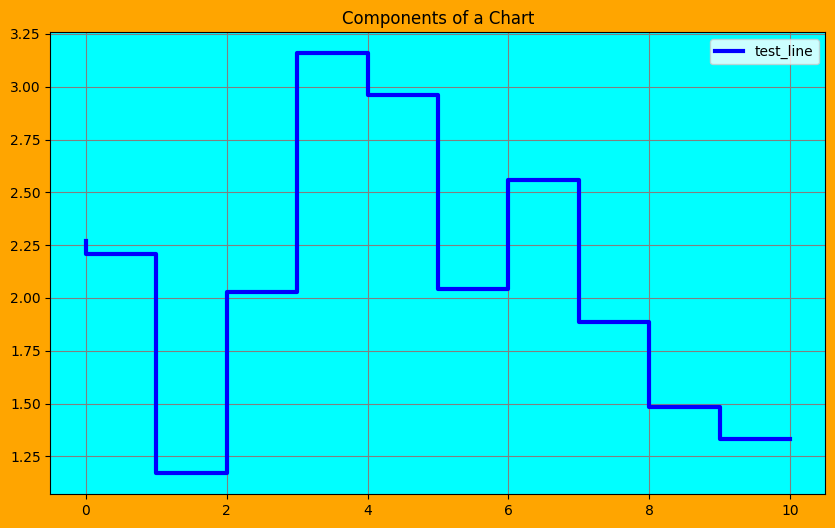

In [2]:
# This cell will be used for illustration of the graph

fig = plt.figure(figsize=(10, 6))  # Figure with 1500x600 resolution
fig.set_facecolor('orange')  # Change Figure Background Color to Red 

ax = fig.add_subplot()  # Add subplot to the figure
ax.set_facecolor('cyan')  # Change background color of the subplot


ax.grid(color='gray')  # Add legend

ax.step(x=range(11), y=np.random.gamma(shape=10, scale=0.2, size=11), 
        color='blue', label='test_line', linewidth=3)  # Plot line

ax.set_title('Components of a Chart')  #title

ax.legend()

plt.savefig('components-of-a-chart.png', dpi=150)

plt.show()

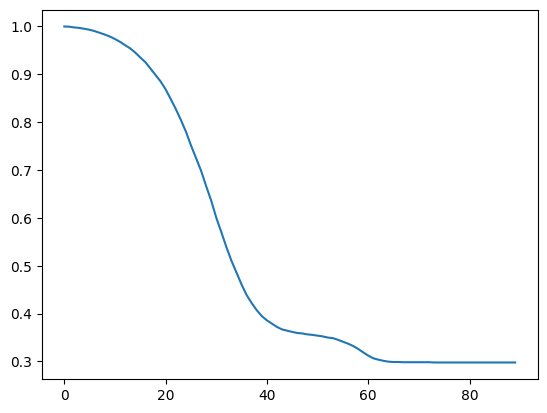

In [3]:
# Initial Graph

DATA_URL = 'https://gist.githubusercontent.com/abduygur/9b103c57b2c5490cd3b0de02dcc77014/raw/33dc799529234b23bb0850c1abe6702ae8c484a5/survival-by-time.csv'

data = pd.read_csv(DATA_URL, 
                   usecols=['time', 'survival_prob'])
data.tail(5)

X = data.time.values
y = data.survival_prob.values


fig = plt.figure()

ax = fig.add_subplot()

ax.plot(X, y)
plt.show()

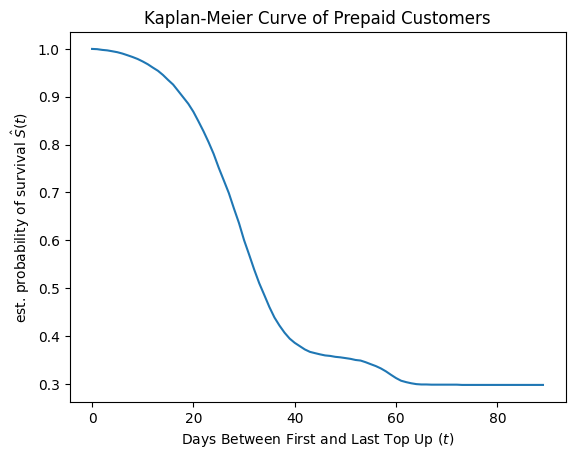

In [4]:
ax.set_title('Kaplan-Meier Curve of Prepaid Customers')
ax.set_ylabel("est. probability of survival $\hat{S}(t)$")
ax.set_xlabel("Days Between First and Last Top Up ($t$)")

fig.savefig('added_title.png', dpi=150)
fig

In [5]:

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import patches as patches

import matplotlib.font_manager as font_manager
from pathlib import Path


In [6]:
# COLOR CONSTANTS
TITLE_COLOR = '#674188'
LABEL_COLOR = '#674188'
TEXT_COLOR = '#674188'

LINE_COLOR = '#CE7777'

TICK_COLOR = '#C3ACD0'
EDGE_COLOR = '#C3ACD0'

FIGURE_FACECOLOR = '#F7EFE5' 
AXES_FACECOLOR = '#F7EFE5'

DIFF_LINE_COLOR = '#674188'

# Configurations
plt.rcParams['figure.facecolor'] = FIGURE_FACECOLOR
plt.rcParams['axes.facecolor'] = AXES_FACECOLOR

plt.rcParams['axes.titlecolor'] = TITLE_COLOR
plt.rcParams['axes.labelcolor'] = LABEL_COLOR

plt.rcParams['xtick.color'] = TICK_COLOR
plt.rcParams['ytick.color'] = TICK_COLOR

plt.rcParams['axes.edgecolor'] = EDGE_COLOR 

plt.rcParams['text.color'] = TEXT_COLOR


plt.rcParams['axes.spines.left'] = False 
plt.rcParams['axes.spines.right'] = False 
plt.rcParams['axes.spines.top'] = False 

In [7]:
# Font Path CONSTANTS
ROOT = Path('.')
POPPINS_FAMILY_PATH = ROOT.joinpath('poppins')


font_dirs = [POPPINS_FAMILY_PATH]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams['font.family'] = 'Poppins'
plt.rcParams['font.size'] = 18

In [8]:
# Designs

plt.rcParams['axes.titlepad'] = 30

plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 3.4

plt.rcParams['ytick.major.pad'] = 3.5
plt.rcParams['ytick.minor.pad'] = 3.4

plt.rcParams['axes.labelpad'] = 15

plt.rcParams['grid.alpha'] = 0.3

In [9]:
# Dataset Load

DATA_URL = 'https://gist.githubusercontent.com/abduygur/9b103c57b2c5490cd3b0de02dcc77014/raw/33dc799529234b23bb0850c1abe6702ae8c484a5/survival-by-time.csv'

data = pd.read_csv(DATA_URL, 
                   usecols=['time', 'survival_prob'])

X = data.time.values
y = data.survival_prob.values

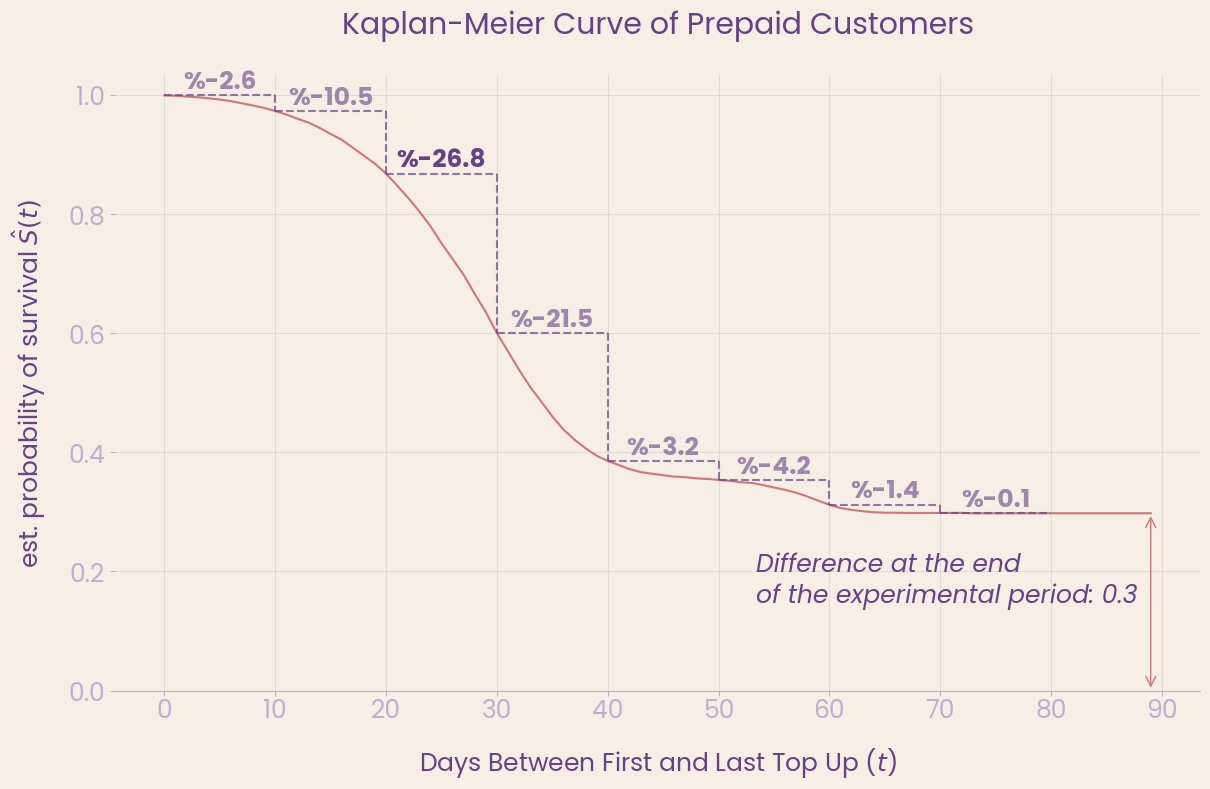

In [10]:
fig2 = plt.figure(figsize=(14, 8))

ax2 = fig2.add_subplot()
ax2.set_title('Kaplan-Meier Curve of Prepaid Customers')
ax2.set_ylabel("est. probability of survival $\hat{S}(t)$")
ax2.set_xlabel("Days Between First and Last Top Up ($t$)")

ax2.plot(X, y, color=LINE_COLOR)

# Y-axis begins from 0
ax2.set_ylim(ymin=0)

# Horizontal & Vertical Grid
ax2.grid()

# Change X Ticks Intervals as 10
ax2.set_xticks(range(0, int(X.max()) + 11, 10))

# Track y-axis changes every 10 days
x_vals = []
y_vals = []

for i in range(0, len(X), 10):
    x_vals.append(i)
    y_vals.append(y[i])

for i in range(len(x_vals) - 1):
    # Horizontal Difference Line
    ax2.plot([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i]], 
             color=DIFF_LINE_COLOR, alpha=0.7, ls='--')
    
    # Vertical Difference Line
    ax2.plot([x_vals[i+1], x_vals[i+1]], [y_vals[i], y_vals[i+1]], 
             color=DIFF_LINE_COLOR, alpha=0.7, ls='--')
    
    # Calculate Difference
    diffs = []
    diff = y_vals[i+1] - y_vals[i]
    
    # Write difference
    if (x_vals[i] == 20):
        alpha = 1
    else:
        alpha = 0.6
        
    ax2.text(x = (x_vals[i] + x_vals[i+1]) / 2, y = y_vals[i], s=f"%{diff*100:.1f}", 
            horizontalalignment="center",
            verticalalignment="bottom",
            fontweight="bold",
            color=TEXT_COLOR,
            alpha=alpha)
# What is the difference between last y value and 0?
ax2.annotate("", xy=(X[-1], 0), xytext=(X[-1], y[-1]), arrowprops={'arrowstyle':'<->', 'color': LINE_COLOR})
ax2.text(X[-1] * 3/5, y[-1] / 2, f'Difference at the end\nof the experimental period: {y[-1]:.1f}', fontdict={'fontstyle': 'italic'})

fig2.savefig('difference_added.png', dpi=150)

plt.show()